In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd

In [16]:
# import dataset


digits = load_digits()

In [17]:
len(digits.feature_names)

64

In [18]:
len(digits.target_names)

10

In [19]:
X = digits.data
y = digits.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = knn.predict(X_test)

In [27]:
score = accuracy_score(y_pred, y_test)
score

0.9805555555555555

In [40]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 36]])

Text(58.222222222222214, 0.5, 'Doğru')

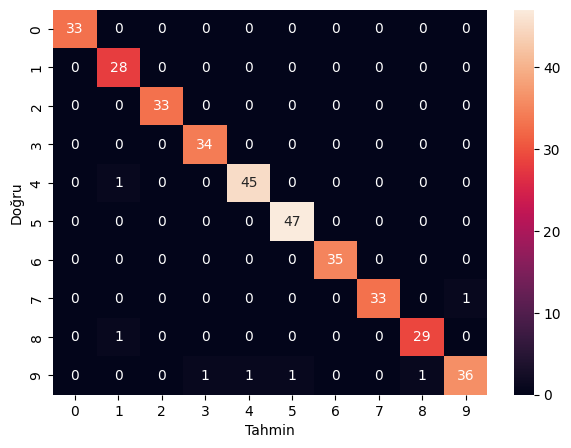

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Tahmin')
plt.ylabel('Doğru')

In [53]:
#1'den 20'ye kadar n_neighbors sayı deneme
train_acc = []
test_acc = []
knn_negihbors = []
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    knn_train_pred_score = accuracy_score(knn.predict(X_train), y_train)
    knn_test_pred_score = accuracy_score(knn.predict(X_test), y_test)
    train_acc.append(knn_train_pred_score)
    test_acc.append(knn_test_pred_score)
    knn_negihbors.append(n)


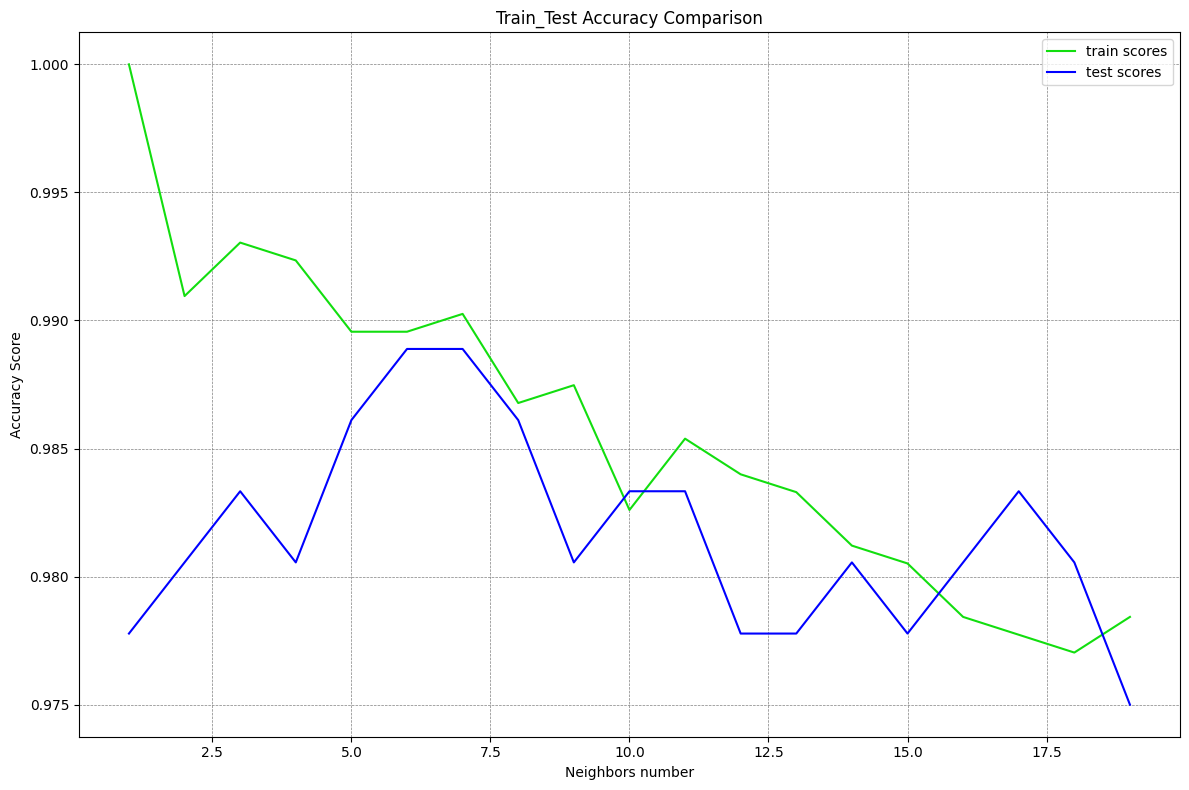

In [55]:
#from matplotlib import pyplot as plt


plt.figure(figsize=(12,8))
plt.title('Train_Test Accuracy Comparison')
plt.xlabel('Neighbors number')
plt.ylabel('Accuracy Score')


plt.plot(knn_negihbors,train_acc,color="#12de0f",label="train scores")
plt.plot(knn_negihbors,test_acc,color="b",label="test scores")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")  #her zaman bunu kullan  #
plt.tight_layout()
plt.legend()
plt.savefig('accuracy.png') 
plt.show()
